# Import Libraries

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import MNIST data

In [24]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Define Variables - Bias and Weights

In [26]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return( tf.Variable(initial) )

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return( tf.Variable(initial) )

# Define Convolution and maxPooling functions

In [27]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1,],padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                         strides=[1,2,2,1],padding='SAME')

# Build Network

In [28]:
x = tf.placeholder(tf.float32,shape=[None,784])
x_image =tf.reshape(x,[-1,28,28,1])
y_ = tf.placeholder(tf.float32,shape=[None,10])

In [29]:
# Layer 1
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Layer 2
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])

# Fully Connected layer
W_fc1 = weight_variable([7*7*64,1024])
b_fc1 = bias_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)

# Dropout Layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

# Readout Layer
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop,W_fc2) + b_fc2

# Train 

In [31]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
sess.run(tf.global_variables_initializer())

Step 0, 	 Accuracy: 0.09 , 	 Train Loss: 4.49, 	 Test Loss: 4.84 
Step 100, 	 Accuracy: 0.91 , 	 Train Loss: 0.30, 	 Test Loss: 0.36 
Step 200, 	 Accuracy: 0.96 , 	 Train Loss: 0.17, 	 Test Loss: 0.19 
Step 300, 	 Accuracy: 0.95 , 	 Train Loss: 0.18, 	 Test Loss: 0.17 
Step 400, 	 Accuracy: 0.91 , 	 Train Loss: 0.36, 	 Test Loss: 0.20 
Test accuracy 0.9596


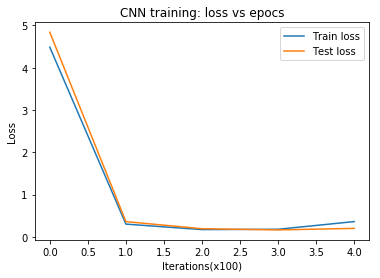

In [32]:
train_loss = []
test_loss = []
for i in range(500):
    batch = mnist.train.next_batch(128)
    if( i%100 == 0):
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1],keep_prob:1.0})
        iter_loss = cross_entropy.eval(feed_dict={x:batch[0],y_:batch[1],keep_prob:1.0})
        train_loss.append(iter_loss)
        
        test_batch = mnist.test.next_batch(1000)
        iter_loss_test = cross_entropy.eval(feed_dict={x:test_batch[0],y_:test_batch[1],keep_prob:1.0})
        test_loss.append(iter_loss_test)
        
        print("Step %d, \t Accuracy: %.2f , \t Train Loss: %.2f, \t Test Loss: %.2f "%(i,train_accuracy,iter_loss,iter_loss_test))
    
    train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5})
    
print("Test accuracy %g"%accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0}))

legend1, = plt.plot(train_loss,label='Train loss')
legend2, = plt.plot(test_loss,label='Test loss')
plt.xlabel('Iterations(x100)')
plt.ylabel('Loss')
plt.title('CNN training: loss vs epocs')
plt.legend()
plt.show()

# Plot confusion matrix

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    np.set_printoptions(precision=0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.colorbar()
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test accuracy: 0.958
Confusion matrix, without normalization


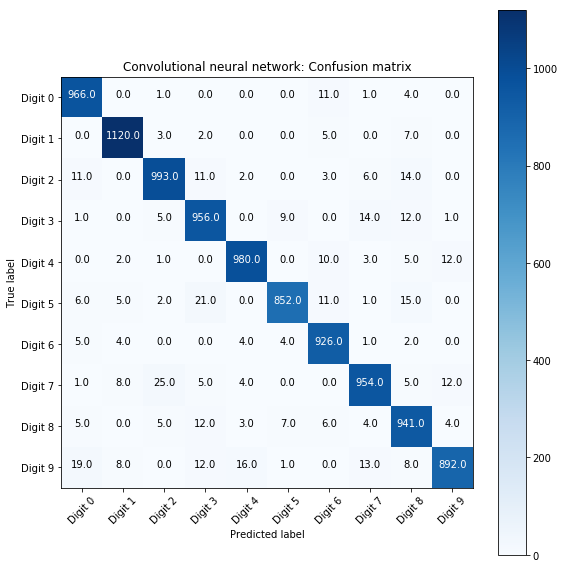

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       983
          1       0.98      0.99      0.98      1137
          2       0.96      0.95      0.96      1040
          3       0.94      0.96      0.95       998
          4       0.97      0.97      0.97      1013
          5       0.98      0.93      0.95       913
          6       0.95      0.98      0.97       946
          7       0.96      0.94      0.95      1014
          8       0.93      0.95      0.94       987
          9       0.97      0.92      0.94       969

avg / total       0.96      0.96      0.96     10000



In [49]:
batch_test = mnist.test.next_batch(10000)
y_pred = y_conv.eval(feed_dict={x:batch_test[0],y_:batch_test[1],keep_prob:1.0})
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(batch_test[1],1)

print "Test accuracy:", accuracy_score(y_pred,y_true)

cnf_matrix = confusion_matrix(y_true, y_pred)

class_names=['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Convolutional neural network: Confusion matrix')

print(classification_report(y_true, y_pred))